In [7]:
!pip install numpy pandas matplotlib scikit-learn seaborn


In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [9]:
x=pd.read_csv("marketing_campaign.csv",delimiter='\t')
x.to_csv('data.csv', index=False)

print(x.head(25))

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   75

In [10]:
import pandas as pd

df = pd.read_csv("marketing_campaign.csv", delimiter='\t')

product_columns = [col for col in df.columns if 'Mnt' in col]
df_products = df[product_columns]

df_products.to_csv("processed.csv", index=False)


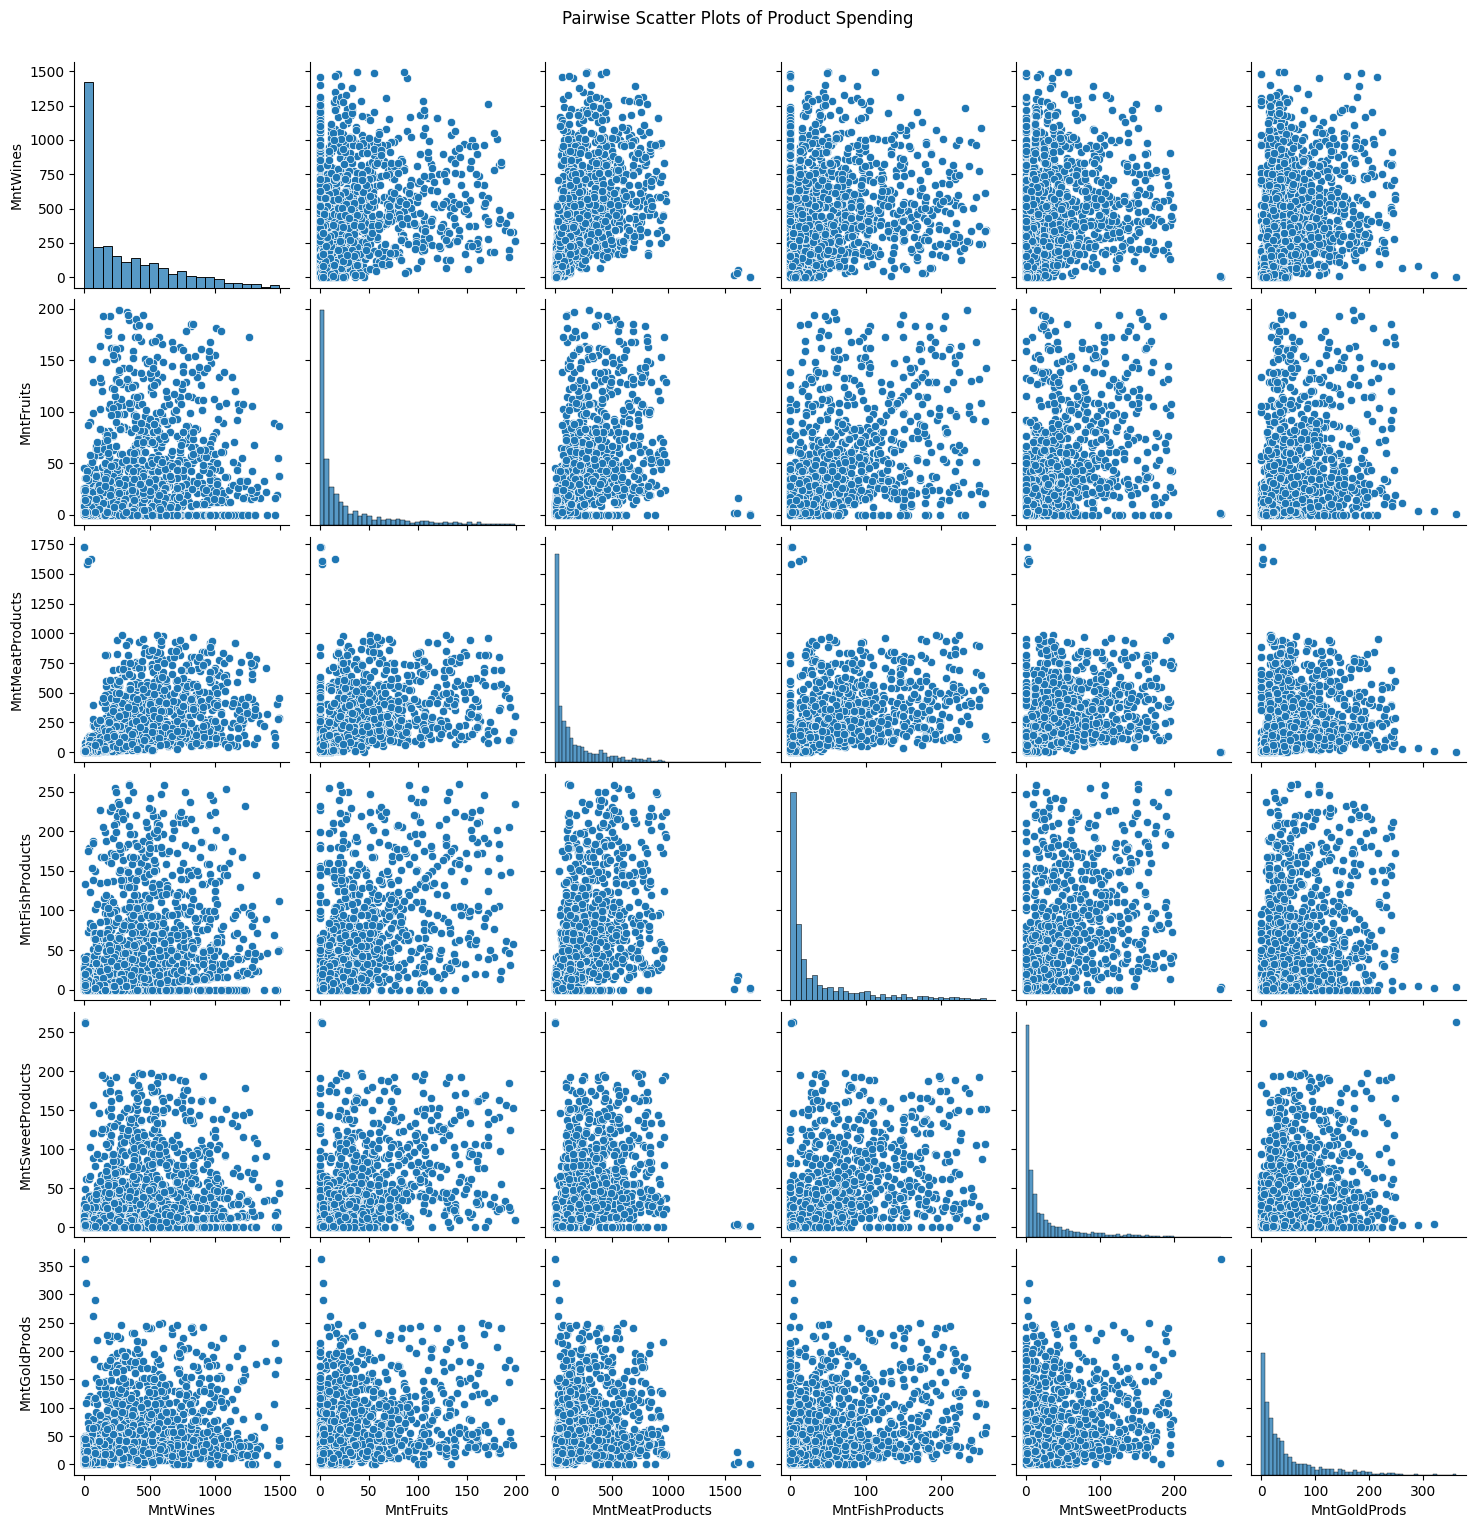

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_products)
plt.suptitle("Pairwise Scatter Plots of Product Spending", y=1.02)
plt.show()


In [15]:
scaler = StandardScaler()
scaled_products = scaler.fit_transform(df_products)
print(scaled_products)


[[ 0.98378127  1.55157698  1.67970233  2.46214705  1.4765001   0.84320691]
 [-0.87047948 -0.63630116 -0.71322541 -0.65044925 -0.63150318 -0.72900579]
 [ 0.36272278  0.57080402 -0.17703234  1.34527426 -0.14690472 -0.03876607]
 ...
 [ 1.79502034  0.545656    0.22178895 -0.10116755 -0.36497403 -0.38388593]
 [ 0.36866592  0.09299156  0.20849491  0.77768317  0.07116458  0.32552712]
 [-0.65355475 -0.58600511 -0.46950129 -0.65044925 -0.63150318 -0.4414059 ]]


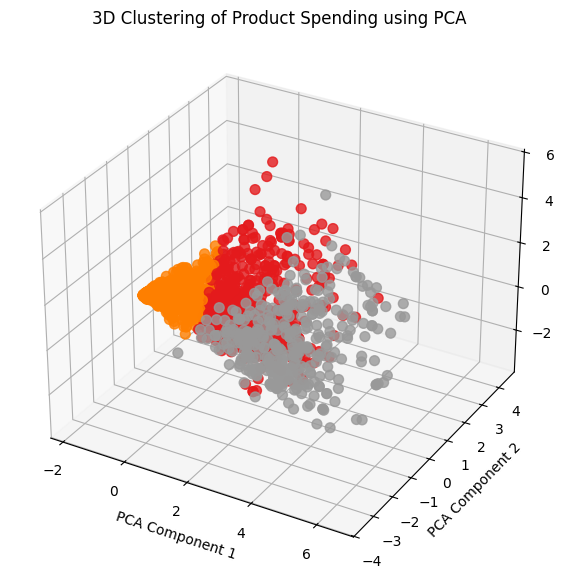

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_products)

# Step 4: Dimensionality Reduction to 3D
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_products)

# Step 5: Plot 3D Scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
    c=clusters, cmap='Set1', s=50, alpha=0.8
)

ax.set_title('3D Clustering of Product Spending using PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()